## 5.차원축소를 통한 데이터압축   
### 5.1 PCA- 주성분 분석을 통한 차원압축 (비지도방식) 

In [1]:
import pandas as pd
df_wine = pd.read_csv('/Users/youngki/study/Deep Learning/3.9.18/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash',
                   'Magnesium', 'total phenols','Flavanoids','Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

df_wine.head() #head()는 앞의 5개 데이터 보여줌

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# 테스트/ 학습데이터 나누기
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test, y_train, y_test = \
    train_test_split(X,y,test_size = 0.3, stratify=y, random_state=0)

In [5]:
# 학습데이터 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [9]:
#공분산 계산
import numpy as np
# np.cov는 특성 x 샘플 따라서 전치필요
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고유값\n', eigen_vals)
# print(f"고유벡터 \n {eigen_vecs}\n")


고유값
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


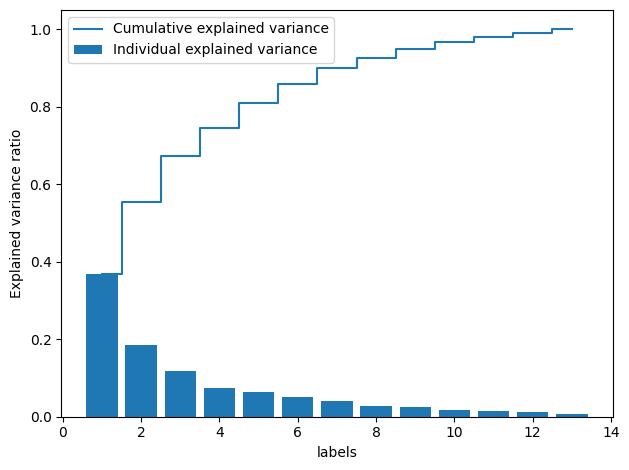

In [11]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align = 'center', label = 'Individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('labels')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


결과 : 상위 주성분 3가지가 75%의 특성을 설명할 수 있음

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# 시각화의 편의성을 위해 상위 2가지만 선택
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))
print(f"투영행렬 \n {w}")

X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

투영행렬 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


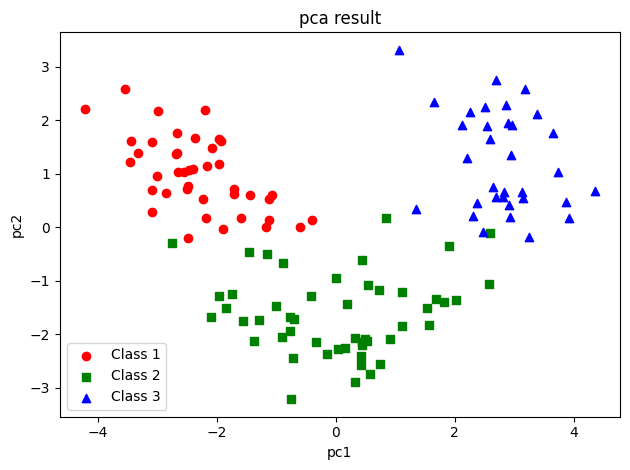

In [18]:
# 시각화
colors = ['r','g','b']
markers = ['o','s','^']
for l,c,m in zip(np.unique(y_train), colors, markers):
    # 불리언 인덱싱을 활용해 if문을 사용하지 않고도 내부에서 조건추가해서 점찍음
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c = c, label=f'Class {l}',marker=m)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("pca result")
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

### 싸이킷런에서의 주성분분석    

In [22]:
from matplotlib.colors import ListedColormap
# 그래프 그리기
def plot_decision_regions(X, y, classifier,test_idx=None, resolution = 0.02):
    markers = ('o','s','^','v','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
                           
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # enumerate(list) > 반복가능 객체의 인덱스, 값 추출
    '''
    np.unique()함수를 통해 y의 고유값(꽃의 종류)를 추출한 후 
    for문을 사용해 각 꽃의 종류마다 plt.scatter에 산점도를 그림
    '''
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0],
                     y=X[y == cl, 1],
                     alpha = 0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=f'Class {cl}',
                     edgecolor = 'black')
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]

        plt.scatter(X_test[:,0], X_test[:,1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')


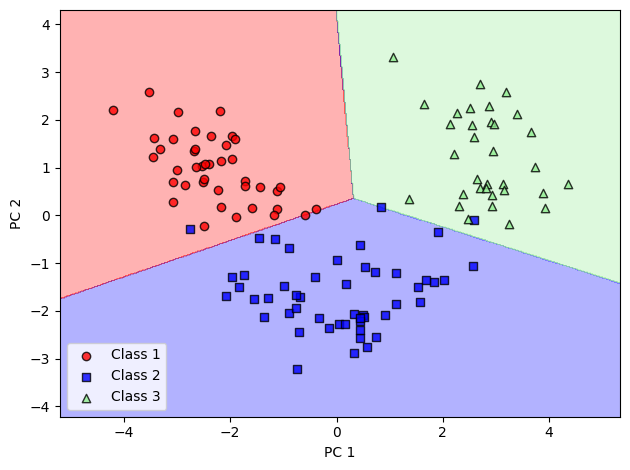

In [26]:
# 학습데이터 기준으로 피팅
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = 'ovr',
                        random_state=1,
                        solver='lbfgs')
# 차원축소
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

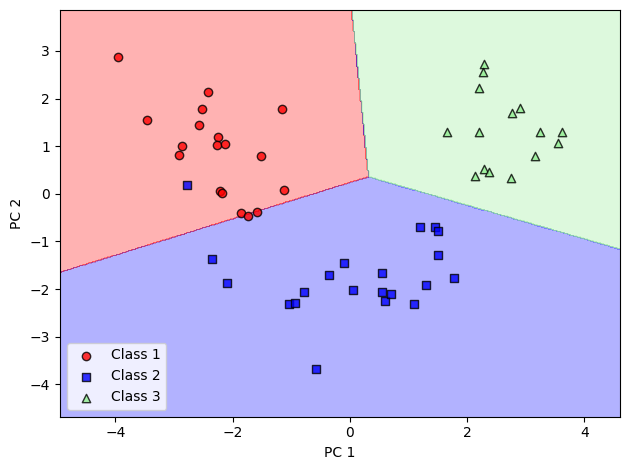

In [27]:
# 피팅된 모델 시각화
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

##### 추가성보
* 성분 개수를 0~1사이로 결정하면 설명된 분산비율을 의미하며, 자동으로 이 비율을 달성하기 위한 주성분 개수를 판단함
* n_components = 'mle'로 지정하면 토마스 민카가 제안한 차원선택방식 사용   
##### PCA의 단점   
* 배치로만 실행되기 때문에 데이터가 많으면 메모리 소모가 크다
    -> 데이터셋의 일부를 사용하여 반복적으로 훈련한다

In [30]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)
print(f"주성분 분석 {ipca.n_components_}\n")
print(f"설명된 분산 비율 {np.sum(ipca.explained_variance_ratio_)}\n")

주성분 분석 9

설명된 분산 비율 0.9478392700446678



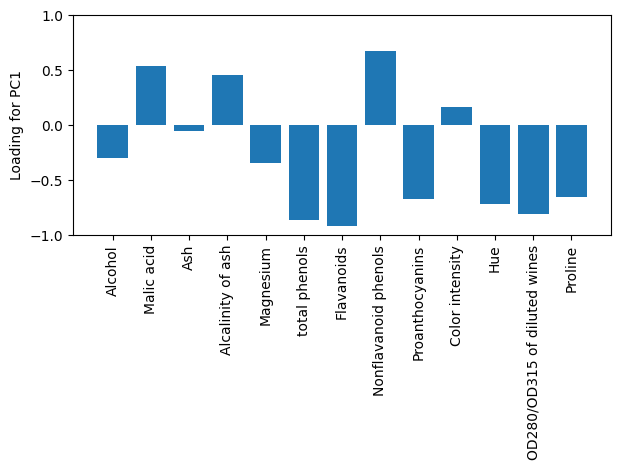

In [33]:
# 주성분에 대해 원본특성의 기여도 - loaging
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:,0],align = 'center')
ax.set_ylabel('Loading for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

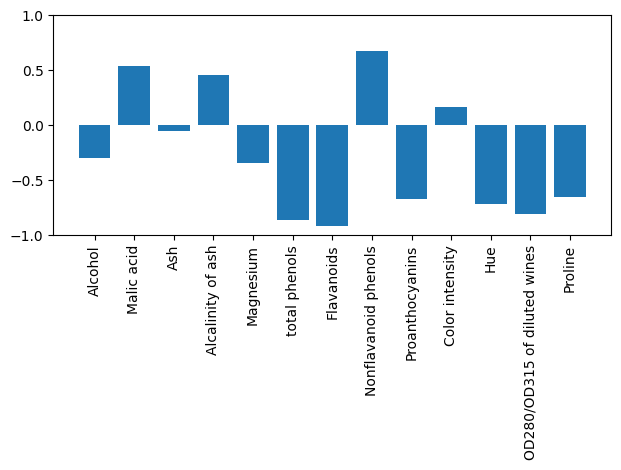

In [35]:
# 사이킷런에서의 PCA로딩

fig, ax = plt.subplots()
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
ax.bar(range(13),sklearn_loadings[:,0],align='center')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()


### 5.2 선형 판별 분석을 통한 데이터압축 (지도방식)
 * PCA와의 차이점 : 지도학습 알고리즘이기때문에 분류 작어베서 더 뛰어난 특성 추출 기법

In [45]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
        X_train_std[y_train == label], axis = 0
    ))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))


MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [46]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    # 공분산 = 스케일 조정된 산포행렬, 정규화된 산포행렬
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print(f'클래스 내의 산포행렬 \n{S_W}\n')


클래스 내의 산포행렬 
[[ 1.2448  0.0967 -0.1276 -0.1105 -0.0726  0.2374  0.0753  0.0231  0.1102
   0.4261  0.1411 -0.0155  0.1224]
 [ 0.0967  2.2666  0.1168  0.3517 -0.2622 -0.0467 -0.0186  0.2194  0.0187
  -0.3939 -0.4167  0.0787 -0.2492]
 [-0.1276  0.1168  2.6024  1.6442  0.5364  0.3947  0.3191  0.4553 -0.0353
   0.06    0.167   0.1987 -0.0081]
 [-0.1105  0.3517  1.6442  2.1604  0.325   0.1535  0.1222  0.273  -0.0824
  -0.068   0.0336  0.2548 -0.1201]
 [-0.0726 -0.2622  0.5364  0.325   2.4397  0.2384  0.1433 -0.5166  0.2566
   0.1445  0.1777 -0.0058  0.2509]
 [ 0.2374 -0.0467  0.3947  0.1535  0.2384  1.352   0.6416 -0.0781  0.7644
   0.4392  0.0177  0.4359  0.1554]
 [ 0.0753 -0.0186  0.3191  0.1222  0.1433  0.6416  0.6968 -0.2588  0.5765
   0.3851 -0.0408  0.2525  0.0748]
 [ 0.0231  0.2194  0.4553  0.273  -0.5166 -0.0781 -0.2588  2.1795 -0.2801
  -0.0363  0.1208 -0.332  -0.1485]
 [ 0.1102  0.0187 -0.0353 -0.0824  0.2566  0.7644  0.5765 -0.2801  2.1792
   0.6795 -0.1815  0.2323  0.1568]
 [ 0.4

In [48]:
mean_overall = np.mean(X_train_std, axis = 0)
mean_overall = mean_overall.reshape(d,1)
d = 13
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    S_B += n*(mean_vec - mean_overall).dot( (mean_vec - mean_overall).T )
print(f"클래스간 산포행렬 {S_B}")


클래스간 산포행렬 [[ 73.2779   5.1521  29.3409 -37.8053  35.3288  27.8688  24.4037 -10.917
   11.9293  51.2816   0.2198  -0.3445  73.9711]
 [  5.1521  33.8209   5.5342  17.6688  -3.0595 -41.4067 -51.4514  32.9397
  -31.0444  36.0237 -47.4845 -53.4785 -18.4551]
 [ 29.3409   5.5342  12.1084 -13.0286  13.5707   6.6597   4.2554  -0.8742
    1.4687  23.8967  -4.84    -5.6837  27.1642]
 [-37.8053  17.6688 -13.0286  31.8532 -21.5944 -40.7237 -44.8903  26.1101
  -25.5242  -6.7623 -28.9705 -32.2968 -52.5343]
 [ 35.3288  -3.0595  13.5707 -21.5944  17.9512  20.621   20.5742 -10.8479
   11.0338  19.3529   7.9757   8.6902  39.5823]
 [ 27.8688 -41.4067   6.6597 -40.7237  20.621   66.8061  78.1916 -47.8401
   45.861  -22.5142  61.6487  69.1515  58.7931]
 [ 24.4037 -51.4514   4.2554 -44.8903  20.5742  78.1916  92.6119 -57.1978
   54.6364 -34.4354  75.5525  84.8261  62.2248]
 [-10.917   32.9397  -0.8742  26.1101 -10.8479 -47.8401 -57.1978  35.584
  -33.8973  25.0189 -47.8855 -53.8    -34.852 ]
 [ 11.9293 -31.0

내림사순의 고윳값

349.617808905994
172.76152218979382
2.5481445655158925e-14
2.5481445655158925e-14
2.338176411255993e-14
2.338176411255993e-14
1.4368252223521912e-14
1.4368252223521912e-14
6.3737818001526064e-15
4.514488639250919e-15
4.514488639250919e-15
2.5784328775550555e-16
0.0


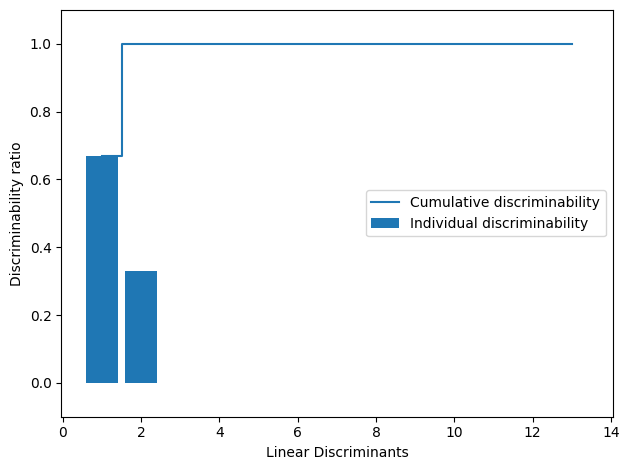

In [55]:
# Sw-1Sb의 고유값 계산 후 주성분 추출
eigen_vals, eigen_vecs =\
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse=True)
print("내림사순의 고윳값\n")
for eigen_val in eigen_pairs:
    print(eigen_val[0])
# 고윳값 내림차순 시각화
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, align='center', label = 'Individual discriminability')
plt.step(range(1,14), cum_discr, where='mid', label = 'Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


In [56]:
# 변환행렬 생성
#  hstack -> 수평으로 결합 -> 열 추가
#  stack -> 수직으로 결합 -> 행 추가
# np.newaxis -> 열백터를 형성하기 위해 차원 추가
w = np.hstack( (eigen_pairs[0][1][:,np.newaxis].real,
                eigen_pairs[1][1][:,np.newaxis].real))
print(f"변환행렬 W: \n {w}")

변환행렬 W: 
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


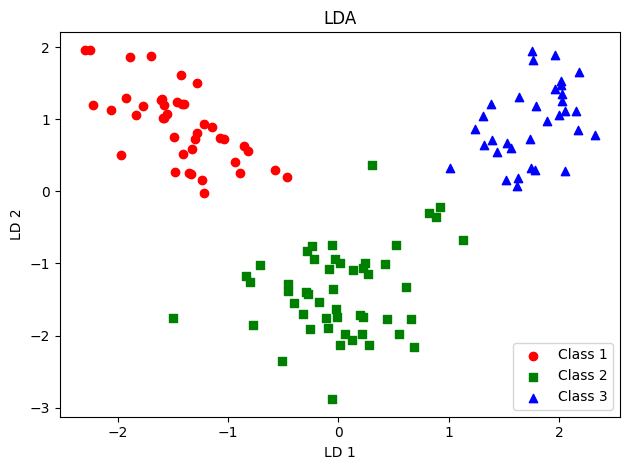

In [58]:
# 학습 데이터셋 분류
X_train_lda = X_train_std.dot(w)
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label = f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title("LDA")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()


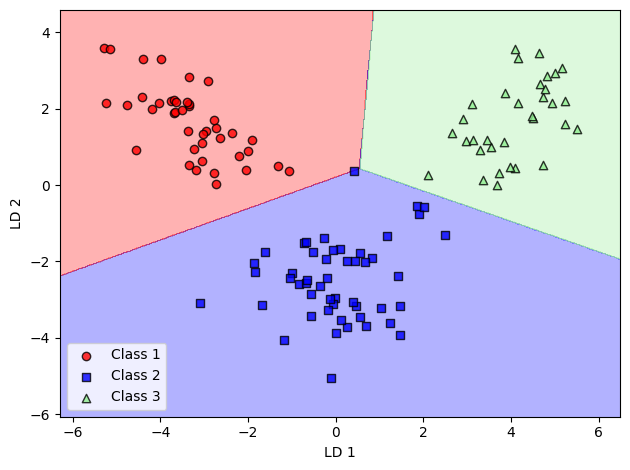

In [64]:
# 사이킷런 LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver = 'lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

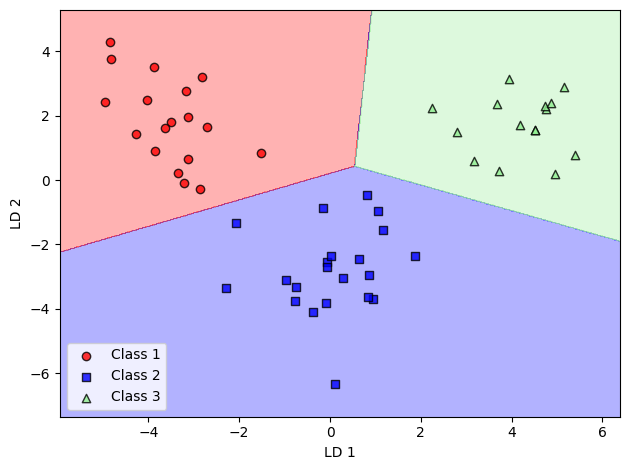

In [67]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc ='lower left')
plt.tight_layout()
plt.show()

### 비선형 차원축소
* 선형분류기들은 선형적으로 완벽하게 분류가능한 것을 가정하고 있기 떄문에 비선형 데이터셋에서는 비선형 차원축소가 필요함
* 하지만 차원축소 후 평가의 어려움으로 인해 여전히 PCA, LDA기법을 많이 사용함

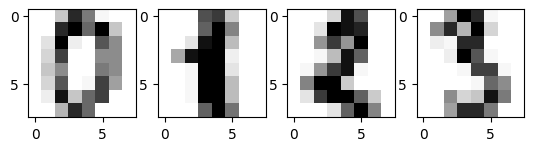

(1797, 64)

In [69]:
# 복잡한 데이터셋을 2, 3차원으로 표현하는 t-sne
# 단순 시각화이기 때문에 전체 데이터셋이 필요한 비지도방식
from sklearn.datasets import load_digits
digits = load_digits()

fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap = 'Greys')
plt.show()
digits.data.shape

In [70]:
# 라벨, 데이터 저장
y_digits = digits.target
x_digits = digits.data

In [76]:
# 64차원의 데이터셋 2차원에 투영
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 123)
X_digits_tsne = tsne.fit_transform(x_digits)

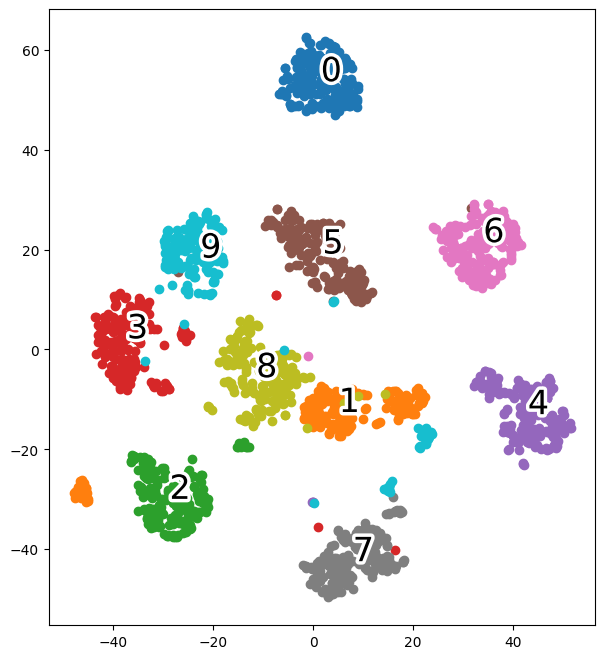

In [77]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize = (8,8))
    ax = plt.subplot(aspect = 'equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i,:], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
plot_projection(X_digits_tsne, y_digits)
plt.show()